### Load data in PCA form and compute decomposition

In [35]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pstack = np.empty((0,400,400))

for fname in ["nbart_red.npy","nbart_green.npy","nbart_blue.npy",
              "nbart_nir_1.npy","nbart_nir_2.npy","nbart_swir_2.npy",
              "nbart_swir_3.npy"]:
    
    band = np.load(fname)
    pstack = np.append(pstack, band, axis=0)
    
pstack = pstack.reshape(pstack.shape[0], -1)

pca = PCA(n_components=20).fit(pstack)

#--------------Get PCs and coeffs---------------

pcs = pca.components_.reshape(-1,400,400)
coeffs = pca.transform(pstack)


### Load data as 3-d tensor and compute Tucker decomposition 

In [8]:
from tensorly.decomposition import tucker
from tensorly import tucker_to_tensor

stack = np.empty((0,400,400))

for fname in ["nbart_red.npy","nbart_green.npy","nbart_blue.npy",
              "nbart_nir_1.npy","nbart_nir_2.npy","nbart_swir_2.npy",
              "nbart_swir_3.npy"]:
    
    band = np.load(fname)
    stack = np.append(stack, band, axis=0)

nstack = stack - stack.mean(axis=0)

core, factors = tucker(nstack, ranks=[20,400,400])

#--------------Get core and temporal factors---------------

core = np.einsum('ij,kjl->kil', factors[1], core, optimize=True)
core = np.einsum('ij,klj->kli', factors[2], core, optimize=True)
factors = factors[0]

### Plot the principal components of each decomposition side-by-side

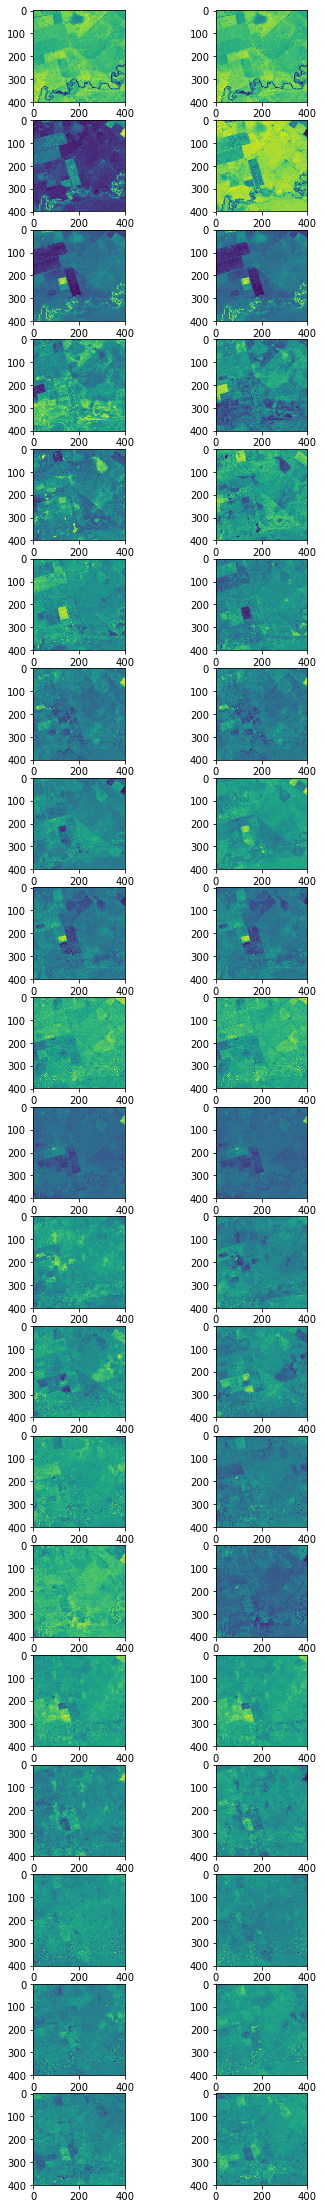

In [17]:
f, axarr = plt.subplots(20,2, figsize=(6,40))

for i in range(20):
    axarr[i,0].imshow(core[i,:])
    axarr[i,1].imshow(pca.components_[i,:].reshape(400,400))

### Temporal coefficients for the first PCA component

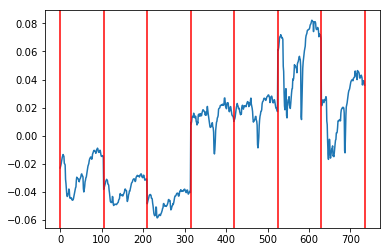

In [25]:
plt.plot(factors[:,0])
for i in range(8):
    plt.axvline(x=i*105,color='r')

### Temporal factors for the first Tucker core entry

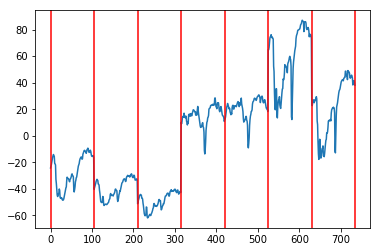

In [32]:
plt.plot(coeffs[:,0])
for i in range(8):
    plt.axvline(x=i*105,color='r')

### Temporal coefficients for the second PCA component

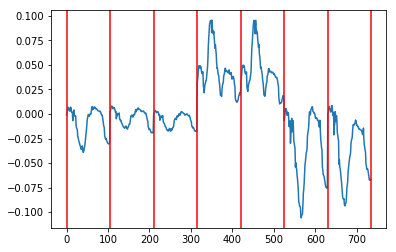

In [33]:
plt.plot(factors[:,1])
for i in range(8):
    plt.axvline(x=i*105,color='r')

### Temporal factors for the second Tucker core entry

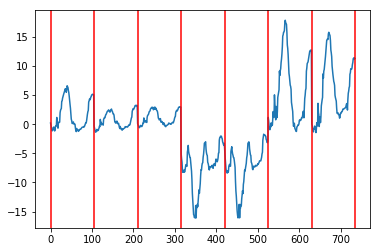

In [34]:
plt.plot(coeffs[:,1])
for i in range(8):
    plt.axvline(x=i*105,color='r')